In [2]:
#Need to do: (Exp RFP/Exp GFP) / (Con RFP/Con GFP) = ratio
#    ECDF formal ratio
#    bootstrap and CI ratio
    

In [1]:
import numpy as np
import pandas as pd
import scipy.stats

import altair as alt

import bootcamp_utils

In [2]:
df = pd.read_csv('smpd3_crispr_tcflef.csv')
df
##df2.loc[df2['variable'] == 'cntl']

,experiment,file name,embryo,side,fluor,ctcf
0,2019.06.16_SMPD3_CRISPR,SMPD3_CRISPR_Emb1_10x.czi,1,cntl,tcf lef,5.149187e+08
1,2019.06.16_SMPD3_CRISPR,SMPD3_CRISPR_Emb2_10x.czi,2,cntl,tcf lef,5.105786e+08
2,2019.06.16_SMPD3_CRISPR,SMPD3_CRISPR_Emb3_10x.czi,3,cntl,tcf lef,2.439080e+08
3,2019.06.16_SMPD3_CRISPR,SMPD3_CRISPR_Emb4_10x.czi,4,cntl,tcf lef,7.919257e+07
4,2019.06.16_SMPD3_CRISPR,SMPD3_CRISPR_Emb5_10x.czi,5,cntl,tcf lef,1.037543e+08
5,2019.06.16_SMPD3_CRISPR,SMPD3_CRISPR_Emb6_10x.czi,6,cntl,tcf lef,3.539025e+08
6,2019.06.16_SMPD3_CRISPR,SMPD3_CRISPR_Emb7_10x.czi,7,cntl,tcf lef,2.460605e+08
7,2019.06.16_SMPD3_CRISPR,SMPD3_CRISPR_Emb8_10x.czi,8,cntl,tcf lef,4.208378e+08
8,2019.06.16_SMPD3_CRISPR,SMPD3_CRISPR_Emb9_10x.czi,9,cntl,tcf lef,6.941377e+07
9,2019.06.16_SMPD3_CRISPR,SMPD3_CRISPR_Emb10_10x.czi,10,cntl,tcf lef,2.782419e+08


In [3]:
# Using for loops to collect the ctcf values for each embryo/side/fluor combination to divide values of TCF/Lef over pCIG

cntl_norm_tcflef = []
expt_norm_tcflef = []

for i in range(10):
    ctcf_tcf = df.loc[(df['embryo'] == i+1) & (df['side'] == 'cntl') & (df['fluor'] == 'tcf lef'), ['ctcf']]
    cntl_tcflef = ctcf_tcf.iloc[0]['ctcf']
    ctcf_pCIG = df.loc[(df['embryo'] == i+1) & (df['side'] == 'cntl') & (df['fluor'] == 'pCIG'), ['ctcf']]
    cntl_pCIG = ctcf_pCIG.iloc[0]['ctcf']
    cntl_norm_tcflef.append(cntl_tcflef / cntl_pCIG)
    
for i in range(10):
    ctcf_tcf = df.loc[(df['embryo'] == i+1) & (df['side'] == 'exp') & (df['fluor'] == 'tcf lef'), ['ctcf']]
    expt_tcflef = ctcf_tcf.iloc[0]['ctcf']
    ctcf_pCIG = df.loc[(df['embryo'] == i+1) & (df['side'] == 'exp') & (df['fluor'] == 'pCIG'), ['ctcf']]
    expt_pCIG = ctcf_pCIG.iloc[0]['ctcf']
    expt_norm_tcflef.append(expt_tcflef / expt_pCIG)
    
norm_values = pd.DataFrame({'cntl' : cntl_norm_tcflef, 'expt': expt_norm_tcflef})
norm_values['embryo'] = [i+1 for i in range(len(norm_values))]
norm_values2 = pd.melt(norm_values, id_vars='embryo', value_vars=['cntl', 'expt'])
norm_values2

,embryo,variable,value
0,1,cntl,2.164114
1,2,cntl,3.063780
2,3,cntl,1.550695
3,4,cntl,0.875284
4,5,cntl,0.766833
5,6,cntl,1.425505
6,7,cntl,0.884113
7,8,cntl,1.013433
8,9,cntl,0.511257
9,10,cntl,0.613350


In [4]:
norm_values2.loc[(df['embryo'] == 1) & (df['variable'] == 'cntl'), ['value']]


KeyError: 'variable'

In [5]:
ratio_list = []

for i in range(10):
    expt = norm_values2.loc[(df['embryo'] == i+1) & (df['side'] == 'expt'), 'value']
    expt2 = expt.iloc[0]['value']
    cntl = norm_values2.loc[(df['embryo'] == i+1) & (df['side'] == 'cntl'), 'value']
    cntl2 = cntl.iloc[0]['value']
    ratio_list.append(expt2 / cntl2)
    
ratios = pd.DataFrame({'embryo': [i+1 for i in range(len(ratio_list))], 'ratio' : ratio_list})
ratios

IndexError: single positional indexer is out-of-bounds

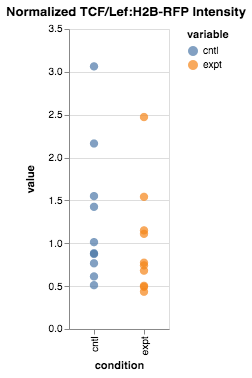

In [6]:
alt.Chart(norm_values2,
    title='Normalized TCF/Lef:H2B-RFP Intensity',
    height=300,
    width=100
    ).mark_circle(
        size=70
    ).encode(
        y='value:Q',
        x=alt.X('variable:N', title='condition'),
        color='variable:N'
    )

In [7]:
df3 = norm_values2.groupby('variable')
df3.head(20)

,embryo,variable,value
0,1,cntl,2.164114
1,2,cntl,3.063780
2,3,cntl,1.550695
3,4,cntl,0.875284
4,5,cntl,0.766833
5,6,cntl,1.425505
6,7,cntl,0.884113
7,8,cntl,1.013433
8,9,cntl,0.511257
9,10,cntl,0.613350


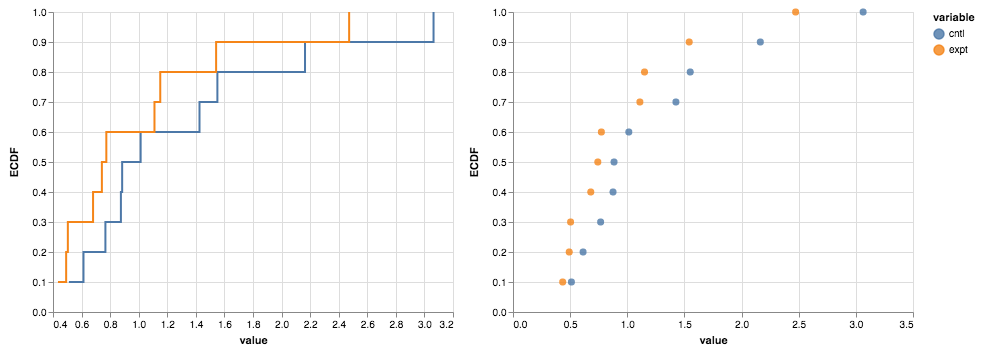

In [8]:
# Compute ECDF
norm_values2['ECDF'] = norm_values2.groupby('variable')["value"].transform(bootcamp_utils.ecdf_y)

# Make the plot
dot = alt.Chart(norm_values2
    ).mark_point(
        size=50,
        filled=True,
        opacity=0.8,
        interpolate='step-before'
    ).encode(
        x=alt.X('value:Q'),
        y='ECDF:Q',
        color='variable:N'
    )

line = alt.Chart(norm_values2
    ).mark_line(
        interpolate='step-before'
    ).encode(
        x=alt.X('value:Q'),
        y='ECDF:Q',
        color='variable:N'
    )
line  | dot

In [9]:
df2 = norm_values2.drop('ECDF', axis=1)

In [11]:
# Number of replicates
n_reps = 100000

# Initialize bootstrap replicas array
cntl = np.empty(n_reps)
expt = np.empty(n_reps)

# Compute replicates
for i in range(n_reps):
    bs_sample_cntl = np.random.choice(df2.loc[df2['variable'] == 'cntl', 'value'], 
                                         size=len(df2.loc[df2['variable'] == 'cntl']))
    cntl[i] = np.mean(bs_sample_cntl)
    
for i in range(n_reps):
    bs_sample_expt = np.random.choice(df2.loc[df2['variable'] == 'expt', 'value'], 
                                        size=len(df2.loc[df2['variable'] == 'expt']))
    expt[i] = np.mean(bs_sample_expt)
    
# Compute ECDF
x_cntl, y_cntl = bootcamp_utils.ecdf_vals(cntl)
x_expt, y_expt = bootcamp_utils.ecdf_vals(expt)

# Thinned set for plotting
df_ecdf_cntl = pd.DataFrame(data={'mean cntl value': x_cntl[::1000],
                                  'ECDF': y_cntl[::1000]})
df_ecdf_expt = pd.DataFrame(data={'mean expt value': x_expt[::1000],
                                  'ECDF': y_expt[::1000]})

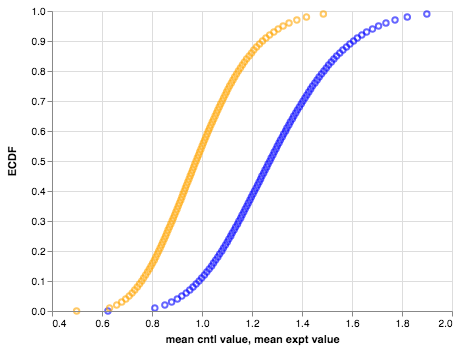

In [13]:
# Make the plot
control = alt.Chart(df_ecdf_cntl
                   ).mark_point(
                    color='blue',
                    opacity=0.6
                   ).encode(
                        x=alt.X('mean cntl value:Q', 
                                scale=alt.Scale(zero=False)),
                        y='ECDF:Q'
                    )

experiment = alt.Chart(df_ecdf_expt
                   ).mark_point(
                    color='orange',
                    opacity=0.6
                   ).encode(
                        x=alt.X('mean expt value:Q', 
                                scale=alt.Scale(zero=False)),
                        y='ECDF:Q'
                    )

control + experiment